# Laboratorio 2 - Parte 1

### Modelos no paramétricos

### 2019-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer integrante
Nombre: Santiago 
#### Segundo integrante
Nombre: Jorge Hiler Ricardo

In [2]:
from __future__ import division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1: Generar muestras

Genere un conjunto de 1000 muestras artificiales con una distribución que corresponda a la suma de dos Gaussiana con diferente media, ambas de una sola dimension. Grafique el histograma de los datos generados. (`plt.hist()`)

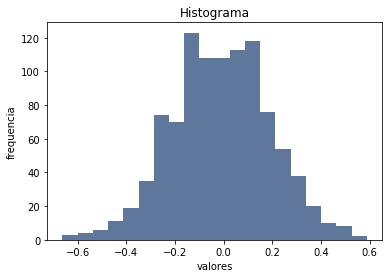

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

np.random.seed(2016) # replicar random

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

## Ejercicio 2: Contextualización del problema

Para el problema de regresion usaremos la misma base de datos del laboratorio anterior `AirQuality.data`. Esta es la base de datos del UCI Machine Learning Repository. En el siguiente URL se encuentra toda la descripción de la base de datos del problema http://archive.ics.uci.edu/ml/datasets/air+quality. Ejecute la siguiente celda para cargar los datos.

In [16]:
#Cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#X: Toma las primeras 5000 filas(muestras) y las columnas 0-11 (carácteristicas)
X = db[:5000,0:12]

#Y: Toma las primeras 5000 filas y la columna 12, corresponde a la salida de la regresión
Y = db[:5000,12]



Describa cómo esta construida la base de datos utilizada en el problema de regresión: 

2.1 ¿Cuántas muestras hay en total?:

In [13]:
print(np.size(X,0))

5000


2.2 ¿Cuántas características tiene el problema?:

In [10]:
print(np.size(X,1))

12


## Ejercicio 3: Completar código de K-Vecinos

Analice los siguientes métodos de la teoría vista para los modelos de *K-vecinos más cercanos (KNN)* y complete el código del método KNN.

<b>Nota</b>: Para el cáculo de la distancia entre vectores tienen dos opciones, usar la función la distancia euclidiana `scipy.spatial.distance.euclidean`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)) o usar la función `numpy.linalg.norm`([Ejemplo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)). Revisen la documentación para comprender su uso. También serán de utilidad las funciones `numpy.sort` y `numpy.argsort`.


In [55]:
import scipy as sc
from statistics import mean
import operator
N = np.size(X,0)


def compararConDatoEntrante(enteredvalue, X_train):
    n = len(X_train)
    result = np.zeros(n)
    i = 0
    for xi in X_train:
        result[i] = sc.spatial.distance.euclidean(xi, enteredvalue)
        i = i + 1
    return result
        

def nearestNeighbors(k, distances):
    nearests = distances[:k]
    return nearests

def sortAndGetIndexes(array):
    indexes = np.argsort(array)
    return indexes

def getYiValues(Y, nearest):
    n = len(nearest)
    yiArray = np.zeros(n)
    iter = 0
    for i in nearest:
        yiArray[iter] = Y[i]
    return yiArray

def KNN(X_train, Y_train, X_test, k, tipo):
    
    #X_train: Matriz con las muestras de entrenamiento
    #Y_train: Vector con los valores de salida pra cada una de las muestras de entrenamiento
            
    
    #X_val: Matriz con las muestras de validación
    #tipo: Bandera que indica si el problema es de regresión o de clasificación.
    # Si tipo = 0 es un problema de clasificación, si es igual a 1 es un problema de regresión
    
    #Parámetro k que equivale al número de vecinos a tener en cuenta para resolver el problema de 
    #predicción de la variable de salida
    k = k 
    Nt = len(X_test)
    Y_test = np.zeros(Nt)
    
    N = np.size(X_train, 0)
    
    i= 0
    for enteredValue in X:
        print("enteredValue", enteredValue)
        distances = compararConDatoEntrante(enteredValue, X_train)
        orderedNearest = sortAndGetIndexes(distances)
        nearest = nearestNeighbors(k, orderedNearest)
        print("nearest", nearest)
        yiArray = getYiValues(Y, nearest)
        
        if(tipo == 0):
            selected = sc.stats.mode(yiArray)
            Y_test[i] = selected
        elif(tipo == 1):
            selected = mean(yiArray)
            Y_test[i] = selected
        i = i+1
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_test, en el mismo orden.  
    return Y_test 

## Ejercicio 4: Entrenamiento y pruebas

Una vez haya completado el codigo del método de KNN:
1. Ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro  $k$ que corresponde al número de vecinos
2. Completar la tabla de resultados con el error MAPE y la desviación estándar.

In [28]:
"""
Mean Absolute Percentage Error para los problemas de regresión
"""
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 


"""
Calcular el error en clasificación
"""
def error(Y_lest, Y):
    
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    return error

In [ ]:
from numpy import random
from numpy import matlib
import math
from scipy import stats

N = np.size(X,0)

#Entrenamiento y validación del modelo
random.seed(1)
Error = np.zeros(2)

for j in range(2):
    
    ind=np.random.permutation(N)
    Xtrain = X[ind[0:int(math.ceil(0.7*N))],:]
    Xtest = X[ind[int(math.ceil(0.7*N)):N],:]
    Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
    Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

    #Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = sc.stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

    #Complete con el llamado apropiado de la función que Uds diseñaron 
    #(X_train, Y_train, X_val, k, tipo)
    k = 2
    tipo = 1
    
    Yest = KNN(Xtrain, Ytrain, Xtest, k, tipo)
    
    #Evaluamos las predicciones del modelo con los datos de test
    Error[j] = MAPE(Yest,Ytest)

mape = np.mean(Error)
std = np.std(Error)

print('\nError durante la prueba k=2 ' +  str(mape) + '+-' + str(std))

enteredValue [   2.6 1360.   150.    11.9 1046.   166.  1056.   113.  1692.  1268.
   13.6   48.9]
nearest [871 160]
enteredValue [   2.  1292.   112.     9.4  955.   103.  1174.    92.  1559.   972.
   13.3   47.7]
nearest [871 160]
enteredValue [   2.2 1402.    88.     9.   939.   131.  1140.   114.  1555.  1074.
   11.9   54. ]
nearest [871 160]
enteredValue [   2.2 1376.    80.     9.2  948.   172.  1092.   122.  1584.  1203.
   11.    60. ]
nearest [871 160]
enteredValue [   1.6 1272.    51.     6.5  836.   131.  1205.   116.  1490.  1110.
   11.2   59.6]
nearest [871 160]
enteredValue [1.200e+00 1.197e+03 3.800e+01 4.700e+00 7.500e+02 8.900e+01 1.337e+03
 9.600e+01 1.393e+03 9.490e+02 1.120e+01 5.920e+01]
nearest [871 160]
enteredValue [1.200e+00 1.185e+03 3.100e+01 3.600e+00 6.900e+02 6.200e+01 1.462e+03
 7.700e+01 1.333e+03 7.330e+02 1.130e+01 5.680e+01]
nearest [871 160]
enteredValue [1.000e+00 1.136e+03 3.100e+01 3.300e+00 6.720e+02 6.200e+01 1.453e+03
 7.600e+01 1.333e+03 7.

nearest [871 160]
enteredValue [   4.1 1542.   283.    16.1 1184.   296.   808.   158.  1780.  1583.
   15.6   42.2]
nearest [871 160]
enteredValue [   3.6 1451.   210.    14.  1117.   239.   875.   161.  1679.  1387.
   18.4   33.8]
nearest [871 160]
enteredValue [   2.8 1328.   154.    12.3 1059.   153.   987.   124.  1600.  1101.
   19.4   31.3]
nearest [871 160]
enteredValue [   2.  1207.   112.     8.6  924.   118.  1088.   102.  1488.   850.
   18.    34.8]
nearest [871 160]
enteredValue [   2.  1240.   108.     9.2  947.   119.  1049.   116.  1532.   947.
   18.4   33.6]
nearest [871 160]
enteredValue [   2.5 1306.   111.    10.2  987.   138.  1004.   124.  1554.  1078.
   17.6   35.1]
nearest [871 160]
enteredValue [   2.3 1326.    97.    10.6 1000.   148.   976.   125.  1602.  1084.
   16.7   37.8]
nearest [871 160]
enteredValue [   3.2 1473.   191.    15.5 1163.   227.   831.   148.  1779.  1395.
   16.1   41. ]
nearest [871 160]
enteredValue [   4.2 1609.   258.    19.6 1286

nearest [871 160]
enteredValue [   3.4 1541.   218.    16.2 1185.   263.   770.    97.  1889.  1407.
   11.7   63.7]
nearest [871 160]
enteredValue [   3.7 1539.   285.    19.7 1287.   229.   698.    95.  2055.  1507.
   13.6   56.3]
nearest [871 160]
enteredValue [   5.3 1735.   437.    25.1 1431.   396.   628.   150.  2211.  1843.
   17.8   42.9]
nearest [871 160]
enteredValue [   4.1 1571.   327.    20.  1297.   314.   730.   162.  1973.  1729.
   21.4   33.3]
nearest [871 160]
enteredValue [   3.3 1452.   283.    18.3 1250.   217.   776.   154.  1868.  1583.
   24.4   27.4]
nearest [871 160]
enteredValue [   4.  1579.   366.    22.3 1359.   252.   724.   161.  1998.  1671.
   25.3   26.1]
nearest [871 160]
enteredValue [   3.8 1466.   318.    20.4 1309.   263.   773.   161.  1897.  1491.
   25.8   23.2]
nearest [871 160]
enteredValue [   2.8 1280.   228.    14.6 1136.   180.   893.   128.  1675.  1240.
   27.    20.2]
nearest [871 160]
enteredValue [   2.9 1407.   201.    16.6 1197

nearest [900 871]
enteredValue [ 5.00e-01  9.13e+02 -2.00e+02  1.30e+00  5.25e+02  1.80e+01  1.62e+03
  2.80e+01  1.26e+03  3.70e+02  1.25e+01  6.68e+01]
nearest [871 160]
enteredValue [ 7.000e-01  9.690e+02 -2.000e+02  2.300e+00  6.070e+02  5.600e+01
  1.373e+03  6.100e+01  1.324e+03  4.380e+02  1.230e+01  6.630e+01]
nearest [871 160]
enteredValue [ 1.500e+00  1.182e+03 -2.000e+02  6.700e+00  8.450e+02  1.150e+02
  1.054e+03  9.900e+01  1.539e+03  7.040e+02  1.240e+01  6.490e+01]
nearest [871 160]
enteredValue [   4.8 1740.  -200.    22.8 1372.   320.   671.   157.  2144.  1476.
   13.    61.6]
nearest [871 160]
enteredValue [   6.2 1819.  -200.    31.3 1582.   357.   575.   166.  2456.  1716.
   13.6   58.8]
nearest [871 160]
enteredValue [   4.  1427.  -200.    19.2 1275.   253.   701.   149.  1980.  1398.
   13.9   57.1]
nearest [871 160]
enteredValue [   3.3 1390.  -200.    16.4 1191.   218.   759.   135.  1879.  1268.
   14.5   54.4]
nearest [871 160]
enteredValue [   2.8 1283.  

nearest [871 160]
enteredValue [   1.9 1211.  -200.     7.9  896.   112.   920.    93.  1624.  1066.
   16.4   55.1]
nearest [871 160]
enteredValue [   1.7 1161.  -200.     6.1  815.    93.   995.    86.  1582.   909.
   16.1   60. ]
nearest [871 160]
enteredValue [ 1.500e+00  1.095e+03 -2.000e+02  5.100e+00  7.670e+02  7.400e+01
  1.050e+03  7.600e+01  1.547e+03  8.180e+02  1.580e+01  6.050e+01]
nearest [871 160]
enteredValue [ 6.000e-01  8.970e+02 -2.000e+02  1.700e+00  5.630e+02  2.300e+01
  1.417e+03  3.300e+01  1.355e+03  4.720e+02  1.630e+01  5.700e+01]
nearest [871 160]
enteredValue [ 4.000e-01  8.420e+02 -2.000e+02  7.000e-01  4.680e+02 -2.000e+02
  1.813e+03 -2.000e+02  1.274e+03  3.940e+02  1.690e+01  5.390e+01]
nearest [ 900 2875]
enteredValue [-2.000e+02  8.540e+02 -2.000e+02  8.000e-01  4.810e+02  1.700e+01
  1.756e+03  2.700e+01  1.304e+03  3.960e+02  1.610e+01  5.590e+01]
nearest [900 871]
enteredValue [ 3.000e-01  8.450e+02 -2.000e+02  7.000e-01  4.720e+02  1.500e+01
  

Responda:

4.1 ¿Qué metodología de validación se usa en el experimento?

4.2 ¿Cuántas muestras se usan para el entrenamiento?

4.3 ¿Cuántas muestras se usan para la validación?

#### Tabla de resultados

In [5]:
import pandas as pd
#!pip install qgrid
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de vecinos' : pd.Series(['1', '2', '3', '4', '5', '6', '7', '100'])})
df_types["Error_Prueba"] = pd.Series()
df_types["Desviación estándar del error"] = ""
df_types.set_index(['Numero de vecinos'], inplace=True)
df_types["Error_Prueba"][1] = "0.3630"
df_types["Desviación estándar del error"][1] = "0.0061"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

/home/deiry/simulacion2019II/sim/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/deiry/simulacion2019II/sim/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [3]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Numero de vecinos,,
1,NaN,
2,0.363,0.0061
3,NaN,
4,NaN,
5,NaN,
6,NaN,
7,NaN,
100,NaN,


## Ejercicio 5: Ventana de Parzen

Resolver el mismo problema de regresión, pero con el modelo de *Ventana de Parzen*. Se debe completar el código de la función <font color='blue'>Nadaraya-Watson</font>  Recuerde la función de densidad de probabilidad con la ventana de Parzen.
$$f({\bf{x}}^*) = \frac{1}{N h^d} \sum_{i=1}^{N} K(u_i), \;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$$


Nota: Los métodos `dist_euclidiana` y ECM continuan siendo válidos para el modelo ventana de Parzen.


In [87]:
def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def Nadaraya_Watson(X_train, Y_train, X_val, ancho_h):
    
    h = ancho_h    #Parámetro h que equivale al ancho de la ventana o kernel
    Nv = len(X_val)
    Y_val = np.zeros(Nv)
     
        
        
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.      
    return Y_val


## Ejercicio 6: Entrenamiento y pruebas

Una vez haya completado el codigo del método de Ventana de Parzen, ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro $h$, que corresponde al ancho de la función kernel. Completar la siguiente tabla con los valores del error MAPE obtenidos y su desviación estándar:

#### Tabla de resultados

In [6]:
randn = np.random.randn
df_types2 = pd.DataFrame({
    'Ancho del kernel' : pd.Series(['0.1', '0.9', '1', '2', '3', '5', '10'])})
df_types2["Error_Prueba"] = ""
df_types2["Desviación estándar del error"] = ""
df_types2.set_index(['Ancho del kernel'], inplace=True)
df_types2["Error_Prueba"][1] = "0.3011"
df_types2["Desviación estándar del error"][1] = "0.0031"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types2, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [99]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Ancho del kernel,,
0.1,,
0.9,0.3011,0.0031
1,,
2,,
3,,
5,,
10,,


Responda:

6.1 Si intenta repetir la prueba anterior para un $h = 0.05$ el algoritmo falla. ¿Cuál es la causa de la falla?:

6.2 ¿Cómo evito que se presente la excepción?: